<a href="https://colab.research.google.com/github/AbenezerYBekele/data-analyst/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail sales dataset analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('SalesData.csv')
df.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


 Data overview , summary statistics and checking for missing values

In [ ]:

df.info()

df.describe()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  object        
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
 11  Cost Each         185950 non-null  float64       
 12  Total Cost        185950 non-null  float64       
 13  Profit            185950 non-null  float64       
dtypes: d

,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0


Monthly Revenue Trend

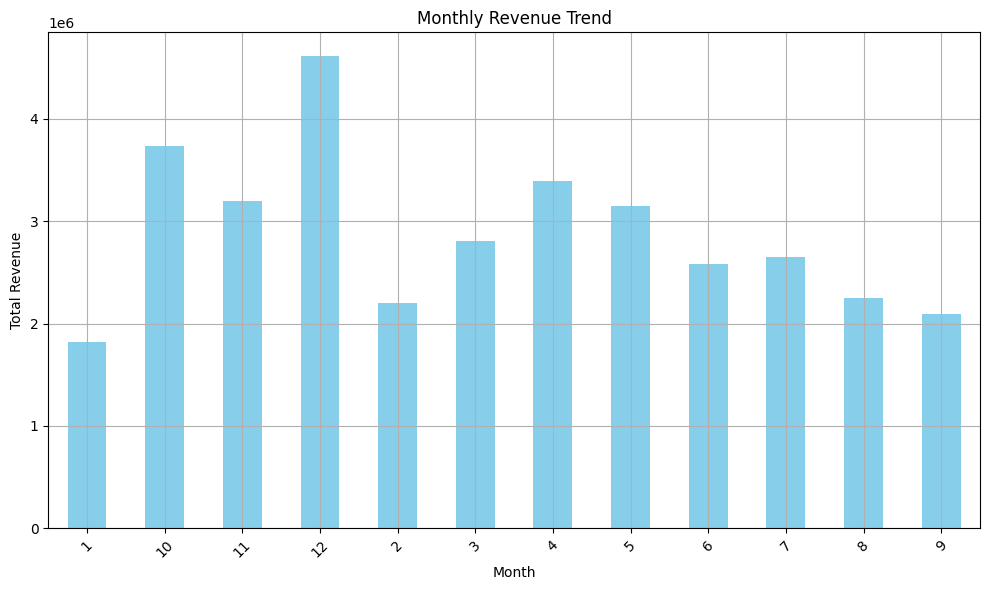

In [3]:
df['Month'] = df['Month'].astype(str)

monthly_sales = df.groupby('Month')['Sales'].sum().sort_index()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


Top 10 spending addresses customer insights

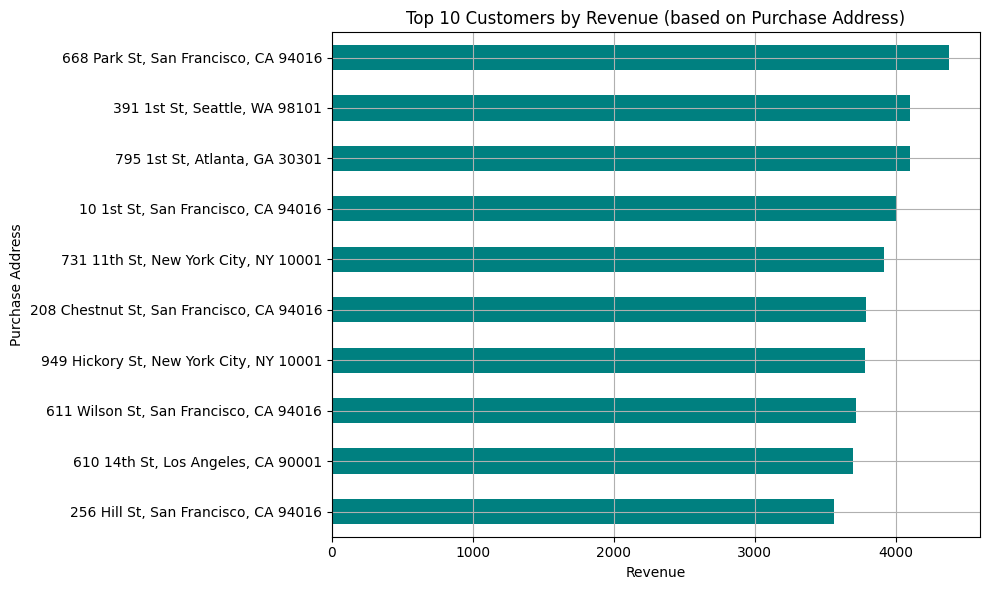

In [4]:
top_customers = df.groupby('Purchase Address')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='barh', color='teal')
plt.title('Top 10 Customers by Revenue (based on Purchase Address)')
plt.xlabel('Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True)
plt.show()

Total revenue by City

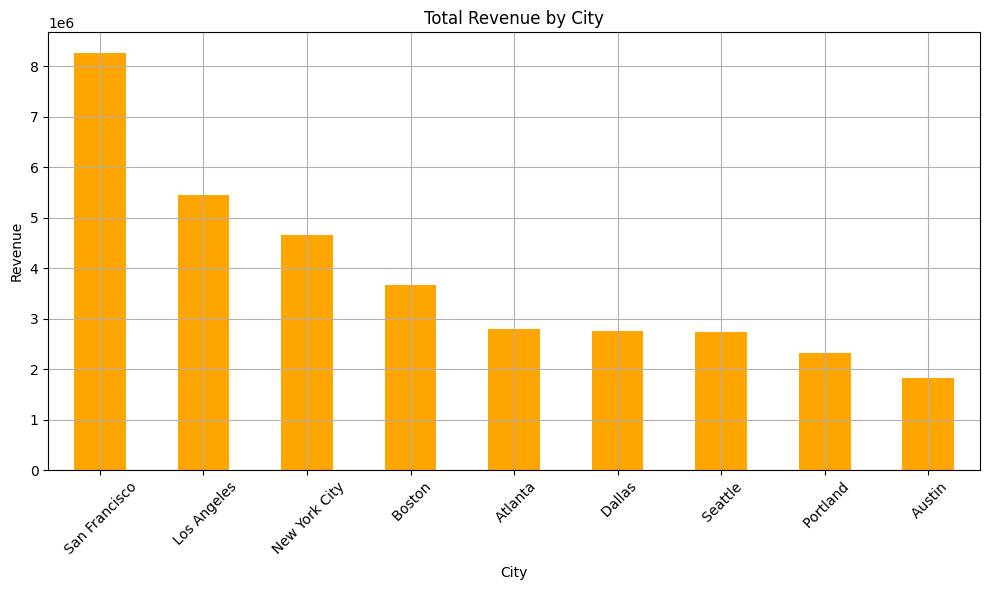

In [5]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color='orange')
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation matrix

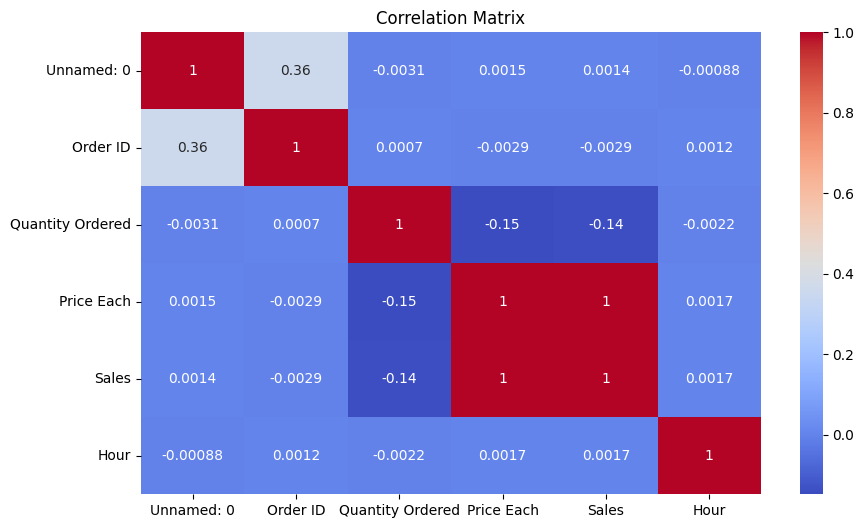

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Product-Level Sales Trends

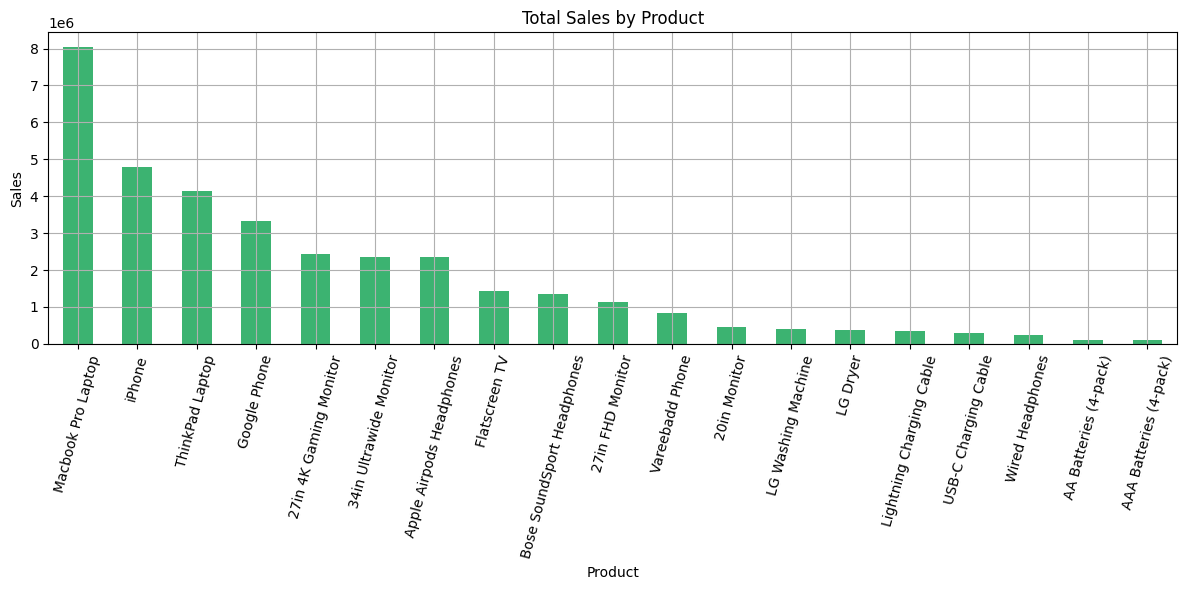

In [7]:
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='mediumseagreen')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=75)
plt.tight_layout()
plt.grid(True)
plt.show()


Profit Margin Analysis

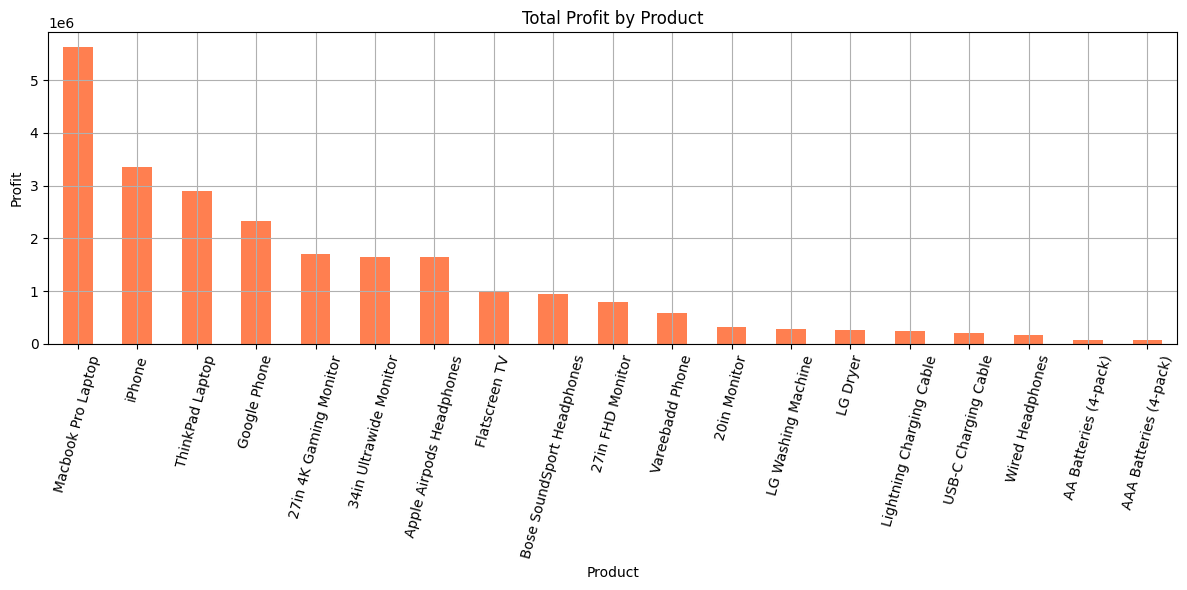

In [8]:

df['Cost Each'] = df['Price Each'] * 0.3
df['Total Cost'] = df['Cost Each'] * df['Quantity Ordered']
df['Profit'] = df['Sales'] - df['Total Cost']

product_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
product_profit.plot(kind='bar', color='coral')
plt.title('Total Profit by Product')
plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=75)
plt.tight_layout()
plt.grid(True)
plt.show()
